In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("E:\\COURSE\\AirPassengers.csv")

In [7]:
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [8]:
df['Month']=pd.to_datetime(df['Month'])

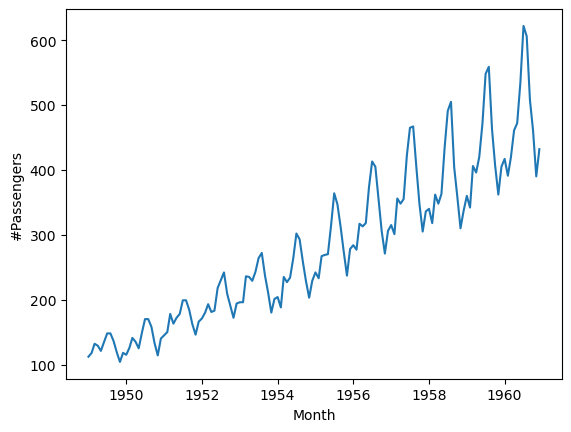

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.lineplot(x="Month",y="#Passengers",data=df)
plt.show()


In [14]:
from statsmodels.tsa.stattools import adfuller


In [31]:
adft=adfuller(df,autolag='AIC')

In [32]:
adft

(0.8153688792060435,
 0.9918802434376409,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [35]:
adft_out=pd.DataFrame({'values':[adft[0],adft[1],adft[2],adft[3],adft[4]['1%'],adft[4]['5%'],adft[4]['10%']],"Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", "critical value (1%)", "critical value (5%)", "critical value (10%)"]})

In [36]:
adft_out

,values,Metric
0,0.815369,Test Statistics
1,0.991880,p-value
2,13.000000,No. of lags used
3,130.000000,Number of observations used
4,-3.481682,critical value (1%)
5,-2.884042,critical value (5%)
6,-2.578770,critical value (10%)


In [ ]:
p-value is greater than critical value data is non-stationary 
it contain increasing trend

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [42]:
df['Month']=df.index

In [43]:
train=df[df['Month']<pd.to_datetime('1960-08',format='%Y-%m')]

In [45]:
train['train']=train['Passengers']

C:\Users\Subash\AppData\Local\Temp\ipykernel_7728\596756636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train']=train['Passengers']


In [48]:
del train['Passengers']

In [49]:
del train['Month']

In [51]:
train.tail()

,train
Month,
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622


In [52]:
test=df[df['Month']>=pd.to_datetime('1960-08',format='%Y-%m')]

In [53]:
test

,Passengers,Month
Month,,
1960-08-01,606,1960-08-01
1960-09-01,508,1960-09-01
1960-10-01,461,1960-10-01
1960-11-01,390,1960-11-01
1960-12-01,432,1960-12-01


In [54]:
test['test']=test['Passengers']

C:\Users\Subash\AppData\Local\Temp\ipykernel_7728\2496591770.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test']=test['Passengers']


In [56]:
del test['Passengers']
del test['Month']

In [57]:
test

,test
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


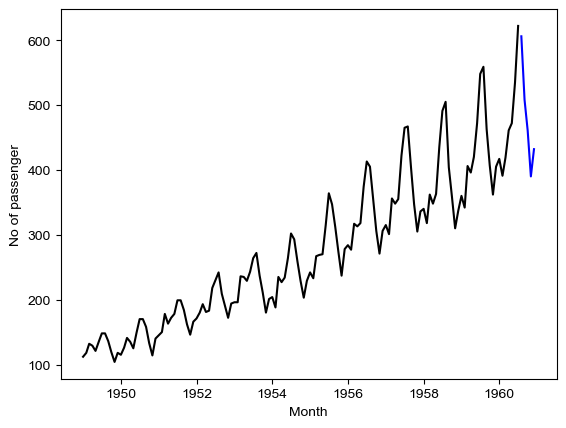

In [59]:
plt.plot(train,color='black')
plt.plot(test,color='blue')
plt.xlabel('Month')
plt.ylabel('No of passenger')
sns.set()
plt.show()

In [60]:
test.tail()

,test
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [63]:
from pmdarima.arima import auto_arima

In [62]:
!pip install pmdarima

     ---------------------------------------- 0.0/566.2 kB ? eta -:--:--
     --------- ---------------------------- 143.4/566.2 kB 2.8 MB/s eta 0:00:01
     ------------------------ ------------- 368.6/566.2 kB 3.3 MB/s eta 0:00:01
     ----------------------------------- -- 532.5/566.2 kB 3.3 MB/s eta 0:00:01
     -------------------------------------  563.2/566.2 kB 3.2 MB/s eta 0:00:01
     -------------------------------------- 566.2/566.2 kB 2.4 MB/s eta 0:00:00
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/ea/8f/216de5d7bede3e26a7131b427a8aadade032f03f9c8ee88792def02e2cf4/Cython-3.0.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   --- ------------------------------------ 0.3/2.8 MB 5.7 MB/s eta 0:00:01
   ----- ---------------------------------- 0.4/2.8 MB 4.5 MB/s eta 0:00:01
   ----- ---------------------------------- 0.4/2.8 MB 4.5 MB/s eta 0:00:0

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [64]:
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True) 
model.fit(train) 
forecast = model.predict(n_periods=len(test)) 
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.81 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1352.593, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1340.702, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1336.259, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1352.415, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1329.986, Time=0.53 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1335.098, Time=0.43 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1336.923, Time=0.29 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1329.407, Time=0.33 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1335.407, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1339.796, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1325.560, Time=0.43 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1336.3

In [65]:
forecast

,Prediction
Month,
1960-08-01,609.537686
1960-09-01,569.572059
1960-10-01,524.515526
1960-11-01,483.039191
1960-12-01,480.300221


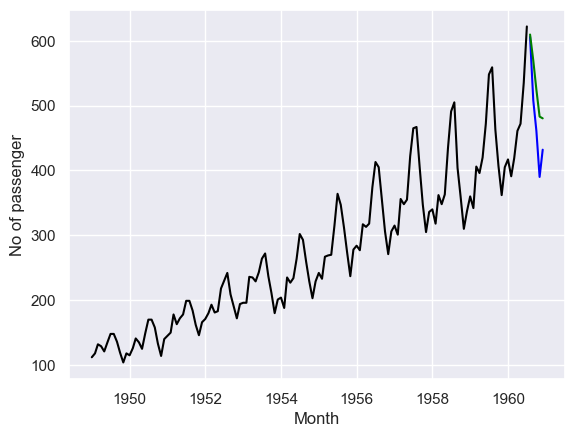

In [66]:
plt.plot(train,color='black')
plt.plot(test,color='blue')
plt.plot(forecast,color='green')
plt.xlabel('Month')
plt.ylabel('No of passenger')
sns.set()
plt.show()

In [67]:
test.tail()

,test
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [68]:
forecast.tail()

,Prediction
Month,
1960-08-01,609.537686
1960-09-01,569.572059
1960-10-01,524.515526
1960-11-01,483.039191
1960-12-01,480.300221


In [69]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms=sqrt(mean_squared_error(test,forecast))
print('rmse:',rms)

rmse: 61.36294977157503


In [17]:
df.set_index("Month",inplace=True)

In [19]:
df['Passengers']=df['#Passengers']

In [23]:
df.rename(columns={'#Passengers':'passenger'})

,passenger,Passengers
Month,,
1949-01-01,112,112
1949-02-01,118,118
1949-03-01,132,132
1949-04-01,129,129
1949-05-01,121,121
...,...,...
1960-08-01,606,606
1960-09-01,508,508
1960-10-01,461,461


In [28]:
df=df.drop(['#Passengers'],axis=1)

In [29]:
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461
